In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('Position_Salaries.csv')
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [18]:
x = data.iloc[:, 1:2]
y = data.iloc[:, 2]

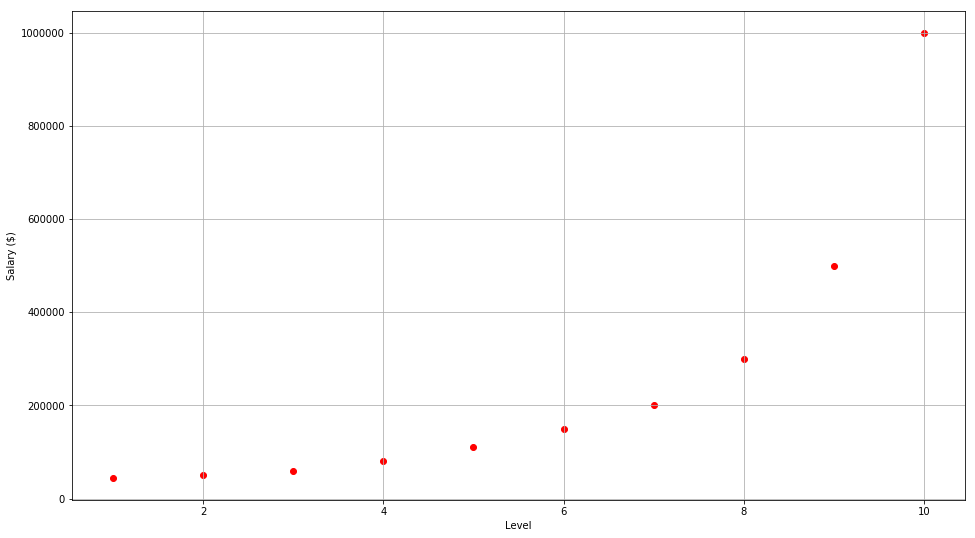

In [19]:
fix, ax = plt.subplots(figsize=(16, 9))
ax.scatter(x, y, c='r')
ax.set_xlabel('Level')
ax.set_ylabel('Salary ($)')
ax.grid()

In [20]:
s_scaler_x = StandardScaler()
s_scaler_y = StandardScaler()
x = s_scaler_x.fit_transform(x)
y = s_scaler_y.fit_transform(y.reshape(-1, 1))

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


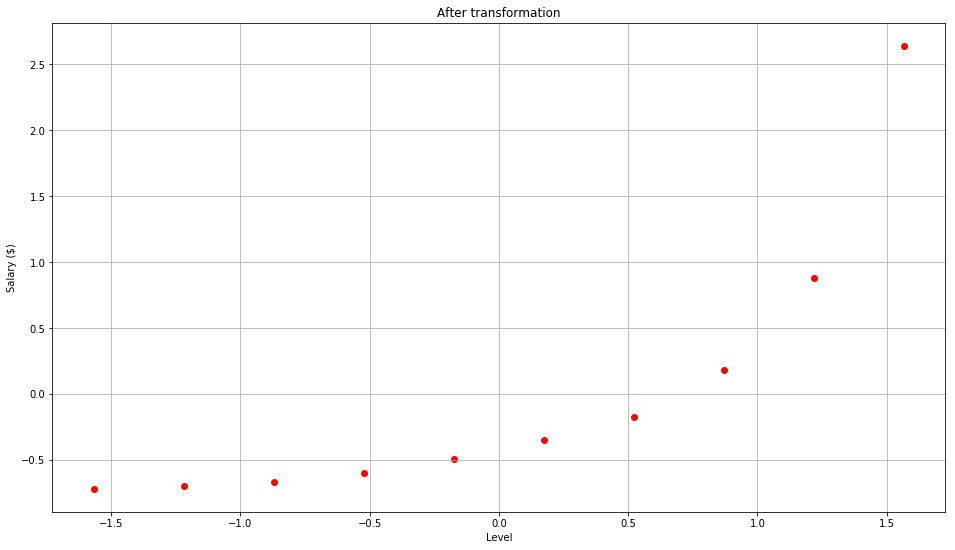

In [21]:
fix, ax = plt.subplots(figsize=(16, 9))
ax.scatter(x, y, c='r')
ax.set_xlabel('Level')
ax.set_ylabel('Salary ($)')
ax.set_title('After transformation')
ax.grid()

In [23]:
clf = SVR(kernel='rbf')
clf.fit(x, y)

/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

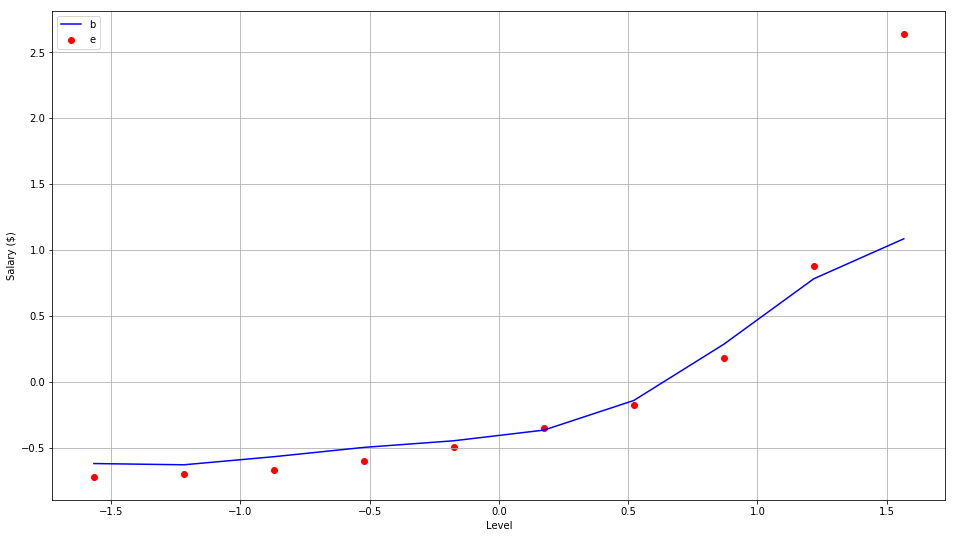

In [28]:
fix, ax = plt.subplots(figsize=(16, 9))
ax.scatter(x, y, label='Real data', color='r')
ax.plot(x, clf.predict(x), label='Model prediction', color='b')
ax.set_xlabel('Level')
ax.set_ylabel('Salary ($)')
ax.legend('best')
ax.grid()

In [30]:
y_pred = s_scaler_y.inverse_transform(
    clf.predict(
        s_scaler_x.transform([[6.5]])
    )
)

In [34]:
print('Predicted annual salary: ${:.2f}'.format(y_pred[0]))

Predicted annual salary: $170370.02
